# 今彩539中獎機率

```
## 今彩539玩法
- 從1~39中隨機取出不重複的5個號碼,作為中獎號碼(ie. 五星), 猜中兩星(含)以上才算中獎,一注 50 元(單位) 
    - 頭獎 = 五星, 獎金 8,000,000 元
    - 二獎 = 四星, 獎金 20,000 元
    - 三獎 = 三星, 獎金 300 元
    - 四獎 = 兩星, 獎金 50 元
    - 沒有獎= 其他, 獎金 0 元


**求出中獎組合與機率(含未中獎) ?**


## 計算今彩539平均報酬率
- **每注平均中獎金額 ?**
- **報酬率 ?** (= (每注平均中獎金額-每注下注金額) /每注下注金額)
```

In [13]:
import pandas as pd
import scipy.special as sps
import numpy as np

def win_comb(x):  # 對中了幾星(x)之組合
    result=sps.comb(stars,x)*sps.comb(N-stars, stars-x)
    if x<2:
        lose_comb = all_comb-sum([win_comb(i) for i in range(2,6)])
        return int(lose_comb)
    return int(result)

# -------- given ----------------
N, stars = 39, 5
bat = 50                                                     # 每注下注金額(單位)
Bouns=np.array([8000000, 20000, 300, 50, 0])                 # 個別中獎之獎金
index_prize = ['頭獎', '二獎', '三獎', '四獎', '沒有獎']      # 個別中獎之獎項
# ---------------------------------
all_comb = int(sps.comb(N, stars))                          # 所有可能組合之樣本空間
each_comb = np.array([win_comb(x) for x in range(5,0,-1)])  # 個別中獎之組合, 包含沒中獎
each_prob = each_comb/all_comb                              # 個別中獎之機率, 包含沒中獎
df = pd.DataFrame({'組合數':each_comb, '機率(%)':each_prob*100,'獎金(NTD)':Bouns},
                  index = index_prize)
print(f'***** 中獎組合與機率(含未中獎) *****\n\n{df}\n')

onlyWin=sum(df['機率(%)'].head(4))
print("*"*40)
print(f'總中獎機率約\t {onlyWin:.3f} %')
excepted_value = each_prob@Bouns                            #每注平均中獎金額
print(f'每注平均中獎金額\t {excepted_value:.3f} 元')
ROI= (excepted_value - bat)/bat * 100
print(f'報酬率\t\t {ROI:.3f} %')

***** 中獎組合與機率(含未中獎) *****

        組合數      機率(%)  獎金(NTD)
頭獎        1   0.000174  8000000
二獎      170   0.029526    20000
三獎     5610   0.974369      300
四獎    59840  10.393274       50
沒有獎  510136  88.602657        0

****************************************
總中獎機率約	 11.397 %
每注平均中獎金額	 27.920 元
報酬率		 -44.160 %


# 假設檢定
- 美國總統的身高近40年(10屆)是否有比較高?
- Data：president_heights.csv

美國總統近10屆之樣本平均身高(cm): 184.6
美國總統前34屆之樣本平均身高(cm): 178.2
u1 = 美國總統近10屆之母體平均身高
u2 = 美國總統前34屆之母體平均身高 
-- 虛無假設 H0: u1-u2<=0
-- 對立假設 H1: u1-u2> 0
t-statistic: 3.43894
p-value: 0.00103


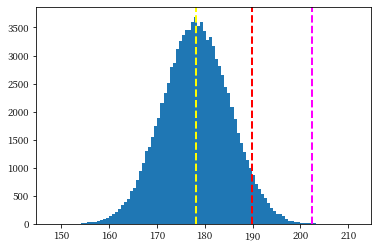

因為 p-value < 0.05, 表示有顯著差異, 因此拒絕虛無假設H0, 則對立假設為真,
換句話說, 美國總統的身高近40年(10屆)是有比較高


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df  = pd.read_csv('./president_heights.csv')
df1 = df.tail(10)['height(cm)']  # 後10屆
df2 = df.head(len(df)-10)['height(cm)']  # 前34屆
print(f'美國總統近10屆之樣本平均身高(cm): {df1.mean():.1f}')
print(f'美國總統前34屆之樣本平均身高(cm): {df2.mean():.1f}')
print("="*50)

# 兩個母體平均數差之假設檢定- 獨立樣本 t檢定, 右尾, p值法, 顯著水準 alpha=0.05
print("u1 = 美國總統近10屆之母體平均身高\nu2 = 美國總統前34屆之母體平均身高 ")
print("-- 虛無假設 H0: u1-u2<=0")
print("-- 對立假設 H1: u1-u2> 0")
print("="*50)   

# Independent T-Test本身只支援雙尾輸出
t,p = stats.ttest_ind(df1, df2, equal_var = False)  #各別樣本數,樣本平均數,樣本標準差皆不同
p1 = p/2    #雙尾產生之p值原是單尾值p之兩倍,須將p值除以2之後,才是真正單尾所需之p值
print(f't-statistic: {t:.5f}')
print(f'p-value: {p1:.5f}')

pop = np.random.normal(df2.mean(), df2.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, df2.mean(), df2.std())
plt.hist(pop, bins=100)
# show the hypothesized population mean
plt.axvline(pop.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(pop.mean() + t*pop.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()
print("""因為 p-value < 0.05, 表示有顯著差異, 因此拒絕虛無假設H0, 則對立假設為真,
換句話說, 美國總統的身高近40年(10屆)是有比較高""")